21638384.07077968
18989141.022768218
16738429.82054968
14824728.43966616
13196150.130785879
11808922.56588473
10626108.038036264
9616526.424414882
8753848.711373474
8015834.000768571
7383687.222302625
6841518.397211696
6375887.3431804385
5975420.270590874
5630486.87318796
5332928.326784678
5075828.132226693
4853319.019311283
4660420.205233195
4492900.20680617
4347161.167420327
4220141.300346054
4109232.5888413764
4012211.33675569
3927179.5445636716
3852515.406458618
3786831.493911615
3728939.418057487
3677819.954207795
3632597.7724398053
3592520.053381998
3556938.382059615
3525293.4083821317
3497101.843411055
3471945.428348901
3449461.570263326
3429335.3866069363
3411292.9410455343
3395095.487170179
3380534.565354364
3367427.8221792327
3355615.442203675
3344957.099005751
3335329.3468737127
3326623.3867066214
3318743.149954185
3311603.653085835
3305129.582383919
3299254.075019195
3293917.6675686934
3289067.387527417
3284655.9670747807
3280641.161489979
3276985.1572595737
3273654.0571602

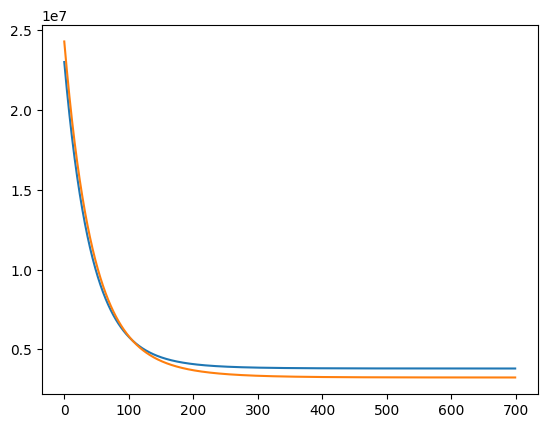

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

global Y
global X
global w

df = pd.read_csv('day.csv')
df = df.drop(['dteday', 'casual', 'registered'], axis=1)
Y = df['cnt']
X = df.drop('cnt', axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.10, random_state=42)
b = 0.1

w = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 0.1, 0.2, 0.3, 0.4, 0.5]

def error(w, b, X, Y):
    sum = 0
    sumW = 0
    modW = 0
    p = 0.2
    s = 0.3

    for linha in range(len(X)):
        multVet = 0

        for coluna in range(len(X.iloc[linha])):
            multVet += X.iloc[linha, coluna] * w[coluna]
        
        result = (multVet + b - Y.iloc[linha])**2
        sum += result
    
    for item in w:
        sumW += (item ** 2)
        modW += abs(sumW) 

    multP = p * sumW
    sig = s * modW

    return sum / X.shape[0] + multP + sig
    
def derivativeW(w, index, X, Y):
    err = error(w, b, X, Y) 
    
    w[index] += 0.1 # Um passo numa variável especifica em um intervalo de 0.1
    nerr = error(w, b, X, Y) # erro no ponto futuro
    w[index] -= 0.1 # Reverte o passo
    
    derivative = (nerr - err) / 0.1 # final menos inicial divido pelo intervalo
    
    return derivative # derivada do erro em relação a variável

def derivativeB(b, X, Y):
    err = error(w, b, X, Y) 
    
    b += 0.1 # Um passo numa variável especifica em um intervalo de 0.1
    nerr = error(w, b, X, Y) # erro no ponto futuro
    b -= 0.1 # Reverte o passo
    
    derivative = (nerr - err) / 0.1 # final menos inicial divido pelo intervalo
    
    return derivative # derivada do erro em relação a variável

alfa = 0.00000004

def sgdW(w, index, X, Y):
    return w[index] - alfa * derivativeW(w, index, X, Y)

def sgdB(b, X, Y):
    return b - alfa * derivativeB(b, X, Y)

batchSize = 100
train = []
tests = []
for e in range(100):
    for k in range(0, X_train.shape[0], batchSize):

        for i in range(len(w)):
            w[i] = sgdW(w, i, X_train.iloc[i:i+batchSize], Y_train)
        b = sgdB(b, X_train.iloc[i:i+batchSize], Y_train)
    
        train.append(error(w, b, X_train, Y_train))
        tests.append(error(w, b, X_test, Y_test))
    
    print(error(w, b, X_test, Y_test))

#gráfico
plt.plot(train)
plt.plot(tests)
plt.show()




